### 在MNIST(手写数字识别数据集)上使用PCA


In [1]:
import numpy as np 
from sklearn.datasets import fetch_mldata
# 为了方便调试，自己去https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat 下载并放到当前目录下的mldata中
# mnist = fetch_mldata('MNIST original') # 下载数据集可能会比较耗时，我们不用这种方法了
mnist = fetch_mldata('MNIST original', data_home='./')

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist['data'], mnist['target']
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [4]:
X_train.shape # 60000张图片，每张都是28*28的，下面显示一张看一下

(60000, 784)

In [5]:
img_tmp = X_train[0].reshape((28, 28))

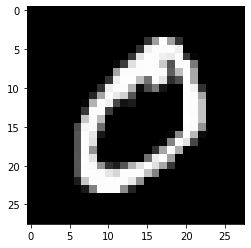

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_tmp, cmap='gray') # 默认是彩色
plt.show()

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test.shape

(10000,)

### 使用kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

Wall time: 19.9 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
%time knn_clf.score(X_test, y_test) # 这里是对所有数据进行训练，所以耗时较长

### PCA进行降维

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
pca = PCA(0.90) # 取90%有效数据对应的维度即可
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [ ]:
X_train_reduction.shape # 想保留90%的数据只需要降维到87维即可(即图像变成从784列变成87列)

In [ ]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

In [ ]:
%time knn_clf.score(X_test_reduction, y_test) # 降维后速度明显加快了

降维去除了噪音，有可能准确率更高！